<a href="https://colab.research.google.com/github/aniketAnvekar/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn

In [ ]:
data_fake = pd.read_csv('/content/drive/MyDrive/Fake_News_Detection/Fake.csv')

In [ ]:
data_true = pd.read_csv('/content/drive/MyDrive/Fake_News_Detection/True.csv')

In [ ]:
data_fake['fake'] = 1
data_true['fake'] = 0

In [ ]:
data_true

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
news_data = pd.concat([data_fake, data_true])
news_data.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
news_data.shape

(44898, 5)

Distributions...
1    23481
0    21417
Name: fake, dtype: int64


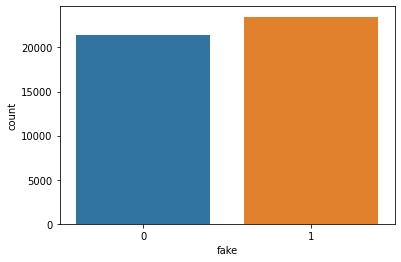

In [ ]:
sns.countplot(x='fake', data=news_data)
print("Distributions...")
print(news_data['fake'].value_counts())

In [ ]:
news_data['text'] = news_data['title'] + news_data['text']
news_data.drop(labels=['title'],axis=1,inplace=True)

news_data.head()

,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


In [ ]:
news_data.drop(labels=['subject','date'],axis=1,inplace=True)
news_data.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [ ]:
input_array = np.array(news_data['text'])

input_array

array([' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is DisturbingDonald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like

In [ ]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0,100):
  review = re.sub('[^a-zA-Z]', ' ', input_array[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(corpus)

100

In [ ]:
corpus

['donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb 

In [ ]:
input_sent = input_array[0][:120]

In [ ]:
input_sent

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is DisturbingDonald Trump just couldn t wish all Ameri'

In [ ]:
output_sent

'donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year '

In [ ]:
output_sent = corpus[0][:100]

In [ ]:
from wordcloud import WordCloud, STOPWORDS

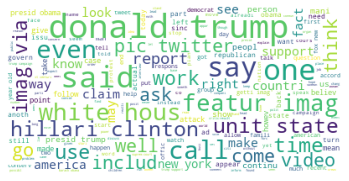

In [ ]:
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(corpus))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X_CV = cv.fit_transform(corpus).toarray()
y = news_data.iloc[0:25000, 1].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1300)
X_tfidf = tfidf.fit_transform(corpus).toarray()
y = news_data.iloc[0:20000, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_CV, y, test_size = 0.25, random_state = 42)

In [ ]:
#from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size = 0.25, random_state = 42)

Naive Bayes

In [ ]:
#### Training Guassain NB with CountVectorizer
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_cv, y_train_cv)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_cv = classifier.predict(X_test_cv)

In [ ]:
sklearn.metrics.accuracy_score(y_test_cv, y_pred_cv)           ##### Accuracy with CountVectorizer     

0.87152

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


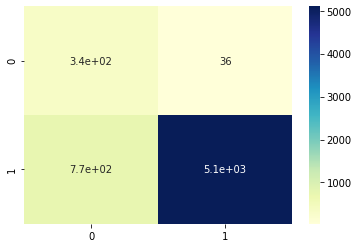

In [ ]:
cm = confusion_matrix(y_test_cv, y_pred_cv)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [ ]:
#### Training Guassain NB with TfidfVectorizer
#from sklearn.naive_bayes import GaussianNB
classifier_tfidf = GaussianNB()
classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_tfidf = classifier_tfidf.predict(X_test_tfidf)

sklearn.metrics.accuracy_score(y_test_tfidf, y_pred_tfidf)            ##### Accuracy with TfidfVectorizer

0.96208

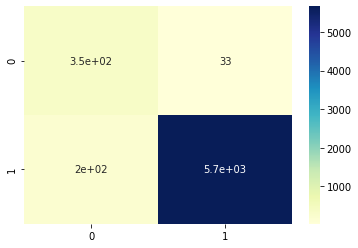

In [ ]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [ ]:
#AUC_dict = {}
print("**********Naive Bayes (TfidfVectorizer)**********")

accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1score = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
nb_probs_tfidf = classifier_tfidf.predict_proba(X_test_tfidf)[:,1]
nb_auc_tfidf = roc_auc_score(y_test_tfidf,nb_probs_tfidf)
print(f"ROC AUC: {nb_auc_tfidf}")


**********Naive Bayes (TfidfVectorizer)**********
F1 score: 0.9795106769257371
Accuracy: 0.96208
ROC AUC: 0.9526970974768894


In [ ]:
print("**********Naive Bayes (CountVectorizer)**********")

accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
f1score_cv = f1_score(y_test_cv, y_pred_cv)
print(f"F1 score: {f1score_cv}")
print(f"Accuracy: {accuracy_cv}")
nb_probs_cv = classifier_tfidf.predict_proba(X_test_cv)[:,1]
nb_auc_cv = roc_auc_score(y_test_cv,nb_probs_cv)
print(f"ROC AUC: {nb_auc_cv}")

**********Naive Bayes (CountVectorizer)**********
F1 score: 0.9270464250022712
Accuracy: 0.87152
ROC AUC: 0.7992951085578437


In [ ]:
#### Training Multinomial NB with TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
classifier_M_tfidf = MultinomialNB()
classifier_M_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_tfidf = classifier_M_tfidf.predict(X_test_tfidf)

In [ ]:
print("**********Multinomial Naive Bayes (TfidfVectorizer)**********")

accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1score = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
nb_probs_tfidf = classifier_M_tfidf.predict_proba(X_test_tfidf)[:,1]
nb_auc_tfidf = roc_auc_score(y_test_tfidf,nb_probs_tfidf)
print(f"ROC AUC: {nb_auc_tfidf}")

**********Multinomial Naive Bayes (TfidfVectorizer)**********
F1 score: 0.9890982844587172
Accuracy: 0.97936
ROC AUC: 0.9888765608166759


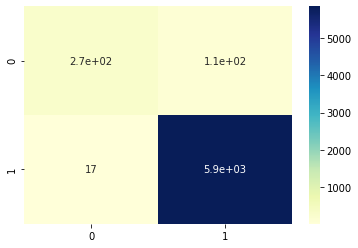

In [ ]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_tfidf = lr.predict(X_test_tfidf)

In [ ]:
print("**********Logistic Regression (TfidfVectorizer)**********")

accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1score = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
nb_probs_tfidf = lr.predict_proba(X_test_tfidf)[:,1]
nb_auc_tfidf = roc_auc_score(y_test_tfidf,nb_probs_tfidf)
print(f"ROC AUC: {nb_auc_tfidf}")

**********Logistic Regression (TfidfVectorizer)**********
F1 score: 0.9944029850746268
Accuracy: 0.98944
ROC AUC: 0.9991163142433062


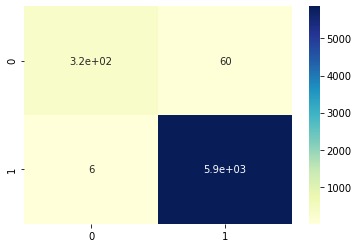

In [ ]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")

SVM

In [ ]:
svc = LinearSVC()
svc_clf = CalibratedClassifierCV(svc)
svc.fit(X_train_tfidf, y_train_tfidf)
svc_clf.fit(X_train_tfidf, y_train_tfidf)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [ ]:
y_pred_tfidf = svc.predict(X_test_tfidf)

In [ ]:
print("**********SVM (TfidfVectorizer)**********")

accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1score = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")

svm_probs_tfidf = svc_clf.predict_proba(X_test_tfidf)[:,1]
svm_auc_tfidf = roc_auc_score(y_test_tfidf,svm_probs_tfidf)
print(f"ROC AUC: {svm_auc_tfidf}")

**********SVM (TfidfVectorizer)**********
F1 score: 0.9975321249255382
Accuracy: 0.99536
ROC AUC: 0.9998000974022053


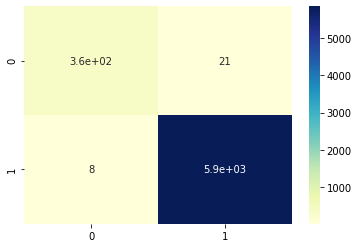

In [ ]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")

XGB

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = xgbc.predict(X_test_tfidf)

In [ ]:
print("********** XGBoost (TfidfVectorizer)**********")

accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
f1score = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
xgb_probs_tfidf = lr.predict_proba(X_test_tfidf)[:,1]
xgb_auc_tfidf = roc_auc_score(y_test_tfidf,xgb_probs_tfidf)
print(f"ROC AUC: {xgb_auc_tfidf}")

********** XGBoost (TfidfVectorizer)**********
F1 score: 0.9988066825775657
Accuracy: 0.99776
ROC AUC: 0.9991163142433062


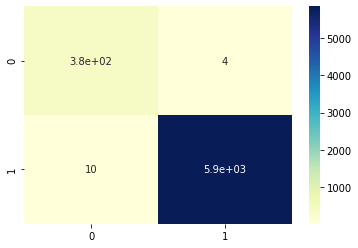

In [ ]:
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, cmap="YlGnBu")

ANN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_CV = cv.fit_transform(corpus).toarray()
y = news_data.iloc[0:35000, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_CV, y, test_size = 0.30, random_state = 42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size = 0.40, random_state = 42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
features = 1500

model = Sequential()

model.add(Dense(features, kernel_initializer='uniform',activation = 'relu', input_dim = features))

model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 500, epochs = 3, validation_data=(X_test1, y_test1))

Epoch 1/3
49/49 [==============================] - 6s 110ms/step - loss: 0.1762 - accuracy: 0.9416 - val_loss: 0.0748 - val_accuracy: 0.9844
Epoch 2/3
49/49 [==============================] - 5s 108ms/step - loss: 0.0414 - accuracy: 0.9920 - val_loss: 0.0536 - val_accuracy: 0.9884
Epoch 3/3
49/49 [==============================] - 5s 107ms/step - loss: 0.0184 - accuracy: 0.9975 - val_loss: 0.0458 - val_accuracy: 0.9898


In [ ]:
y_pred = model.predict(X_test2)
y_pred = (y_pred > 0.5)

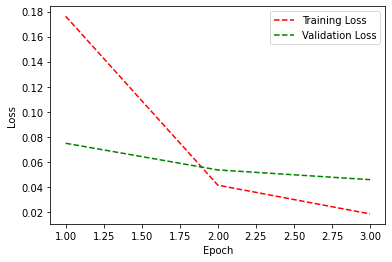

--------------------------------------------
Printing classification_report for Test Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1406
           1       0.99      0.99      0.99      2794

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

--------------------------------------------


In [ ]:
# Get training and validation loss histories
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, train_loss, 'r--')
#plt.plot(epoch_count, accuracy_val, 'b-')
plt.plot(epoch_count, validation_loss, 'g--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


# Predicting the Test set results
y_pred = model.predict(X_test2)
y_pred = (y_pred > 0.5)

print("--------------------------------------------")
print("Printing classification_report for Test Set")    
from sklearn.metrics import classification_report
print (classification_report(y_test2, y_pred))
print("--------------------------------------------")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

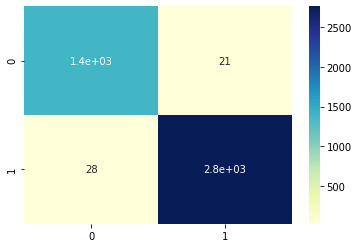

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1501      
Total params: 2,253,001
Trainable params: 2,253,001
Non-trainable params: 0
_________________________________________________________________
